Description:The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

# Data Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


# Exploring data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
df.shape


(158, 12)

In [8]:
df.describe(include="all")

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Indonesia,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,NaN,NaN,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,NaN,NaN,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,NaN,NaN,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,NaN,NaN,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,NaN,NaN,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415


#we have total 158 countries
#there are no null values
#average happiness score of country is 5.3757
#maximum score is 7.58 and minimum is 2.839000
#countries are divided into 10 unique regions
#diffrence between mean and median is minimum which shows less skewness

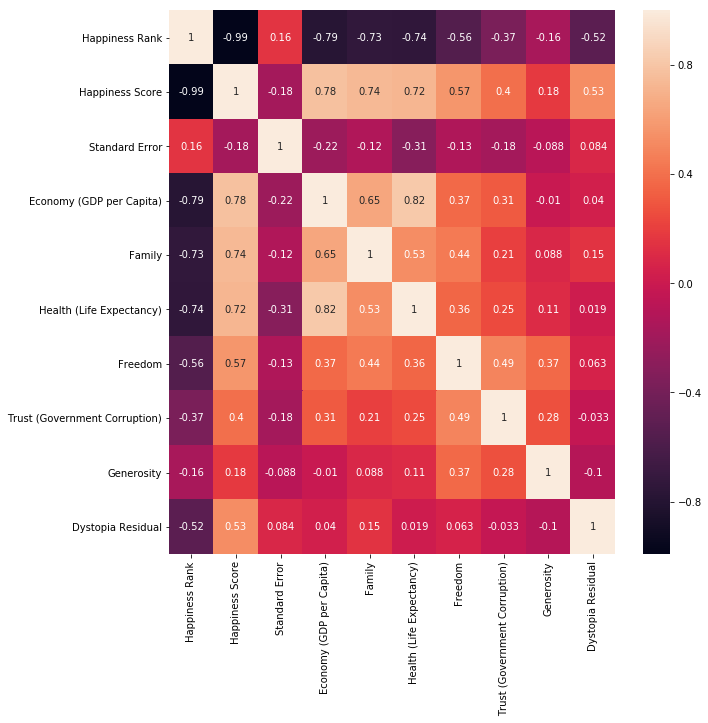

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [10]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


#From above tables we can see that happiness rank commpletly dependent on happiness score. high happiness score will obvisoly will be first rank so it is better to remove rank colum
#Country column is also not required science the score is not dependent on country

In [11]:
df.drop(labels=["Happiness Rank","Country" ], axis=1,inplace=True)
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# EDA

#Univariant analysis

In [12]:
Region=df["Region"].value_counts()
Region

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

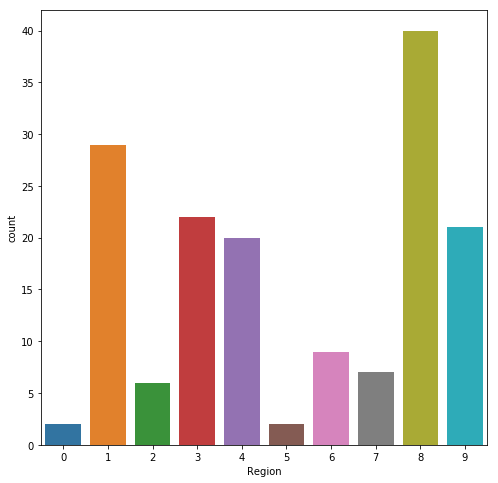

In [13]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Region"] =le.fit_transform(df["Region"])
plt.figure(figsize=(8,8))
sns.countplot(df["Region"])

#From above graph we can see that Sub-Saharan Africa has most number of regions and Australia and New Zealand has verry less number of regions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B650CF8>,
      dtype=object)

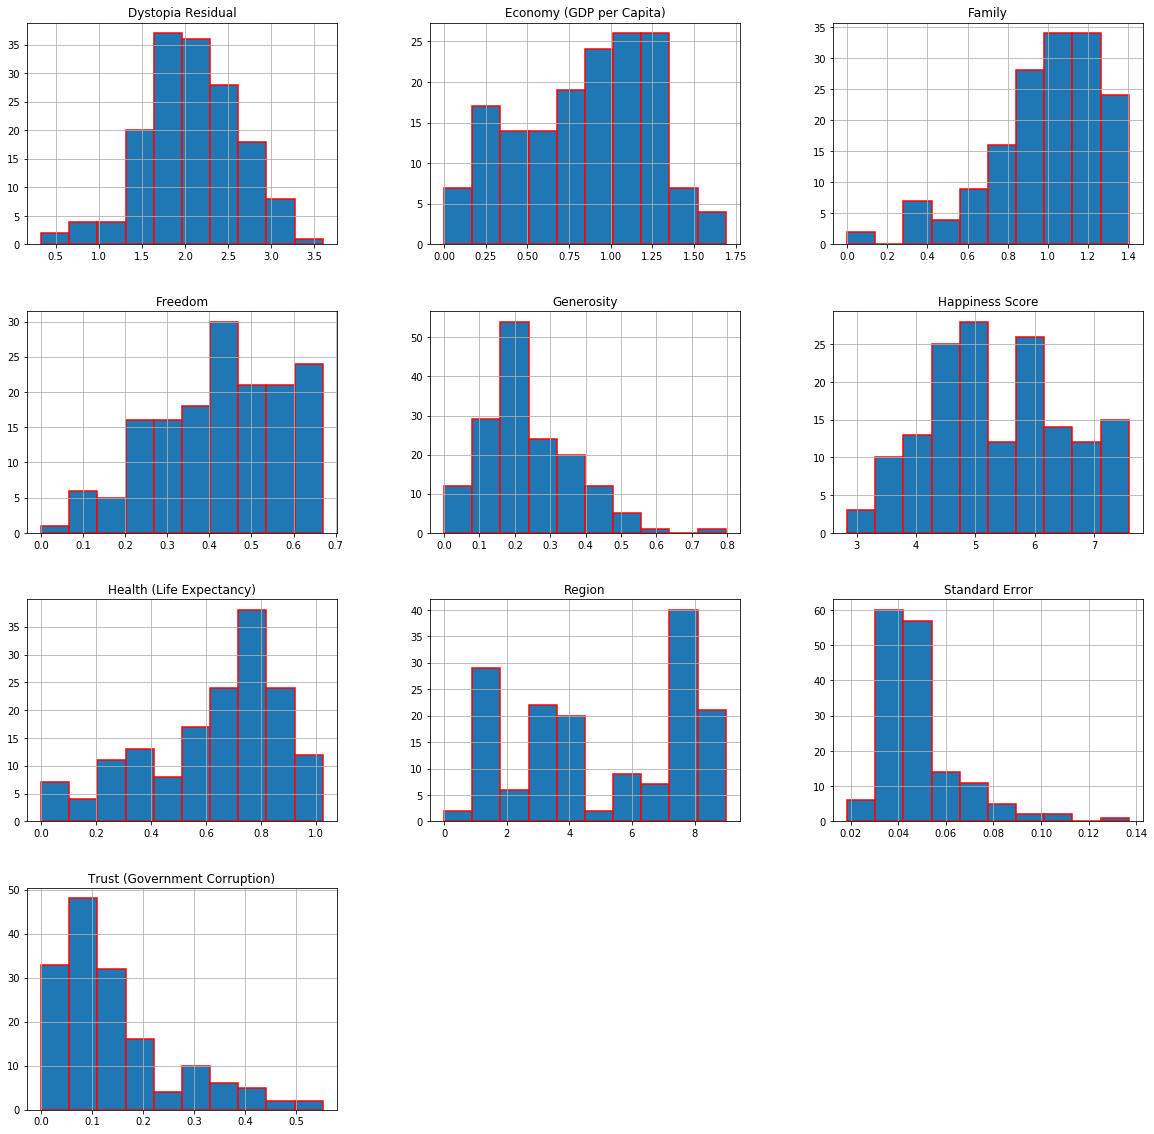

In [14]:
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

#most of the countries have gdp per mcapita between .05 to 1.25
#most ofm the countries have good freedom of index .4 to .7
#Trust on goverment is less in most of the countries
#averge life expectancy in .63 but most of the countries have life expectancy above average.

In [15]:
#Bi-Variant analysis

In [16]:
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64
Average hapiness score of 0 is: 7.285
Average hapiness score of 1 is: 5.332931034482758
Average hapiness score of 2 is: 5.626166666666666
Average hapiness score of 3 is: 6.144681818181818
Average hapiness score of 4 is: 5.406899999999999
Average hapiness score of 5 is: 7.273
Average hapiness score of 6 is: 5.317444444444445
Average hapiness score of 7 is: 4.580857142857143
Average hapiness score of 8 is: 4.202800000000001
Average hapiness score of 9 is: 6.689619047619048


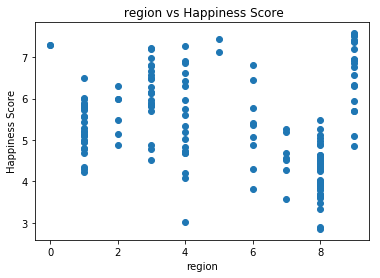

In [17]:
#region vs Happiness Score
plt.scatter(x="Region",y="Happiness Score", data=df)
plt.title(" region vs Happiness Score")
plt.xlabel("region")
plt.ylabel("Happiness Score")
print(Region)
list1=[0,1,2,3,4,5,6,7,8,9]
for i in list1:
      print("Average hapiness score of",i,"is:", df[df.Region==i]["Happiness Score"].mean())

#Region 0-Australia and New Zealand and 5-North America has verry goog hapiness score of average 7.285 and 7.273 respectivly  # # 8-Sub-Saharan Africa is least average happisest score of 4.202800000000001


0.7809655268660218

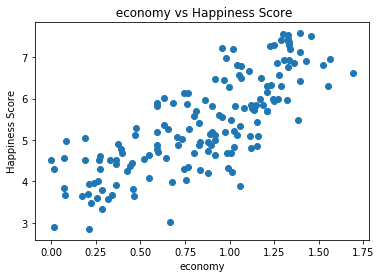

In [18]:
#economy vs Happiness Score
plt.scatter(x="Economy (GDP per Capita)",y="Happiness Score", data=df)
plt.title(" economy vs Happiness Score")
plt.xlabel("economy")
plt.ylabel("Happiness Score")
df["Economy (GDP per Capita)"].corr(df["Happiness Score"])

#countries with  high economy have high Happiness Score
#so it is positivly correlated with .78 corelation value

0.7406051972367851

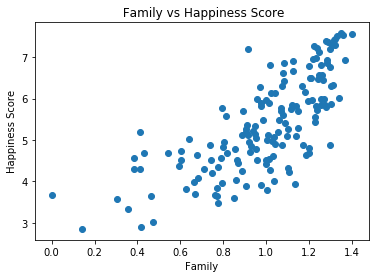

In [19]:
#Family vs Happiness Score
plt.scatter(x="Family",y="Happiness Score", data=df)
plt.title(" Family vs Happiness Score")
plt.xlabel("Family")
plt.ylabel("Happiness Score")
df["Family"].corr(df["Happiness Score"])

#countries with  high Family rating have high Happiness Score
#so it is positivly correlated with .74 corelation value

0.7241995951050698

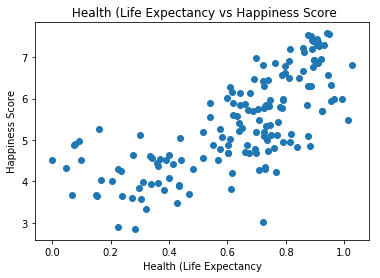

In [20]:
# Health (Life Expectancy vs Happiness Score
plt.scatter(x="Health (Life Expectancy)",y="Happiness Score", data=df)
plt.title(" Health (Life Expectancy vs Happiness Score")
plt.xlabel("Health (Life Expectancy")
plt.ylabel("Happiness Score")
df["Health (Life Expectancy)"].corr(df["Happiness Score"])

#countries with  high Life Expectancy have high Happiness Score in other words happisest people live longer
#so it is positivly correlated with .72 corelation value

0.5682109041925179

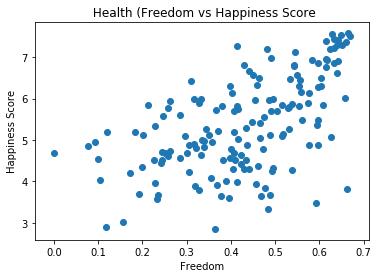

In [21]:
# Health (Life Expectancy vs Happiness Score
plt.scatter(x="Freedom",y="Happiness Score", data=df)
plt.title(" Health (Freedom vs Happiness Score")
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
df["Freedom"].corr(df["Happiness Score"])

#Countries with  good freedom of indexs have high Happiness Score , although there are some countries with good freedom index and low happines socre,
with .72 corelation value we can say happiness increses with freedom 

0.3951985838369111

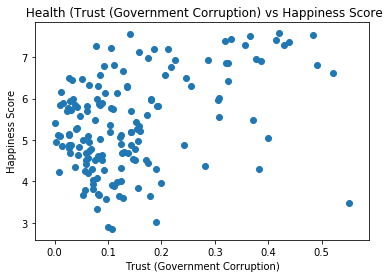

In [22]:
# Trust (Government Corruption) vs Happiness Score
plt.scatter(x="Trust (Government Corruption)",y="Happiness Score", data=df)
plt.title(" Health (Trust (Government Corruption) vs Happiness Score")
plt.xlabel("Trust (Government Corruption)")
plt.ylabel("Happiness Score")
df["Trust (Government Corruption)"].corr(df["Happiness Score"])

#Plot says verry few countries trust thier government
#It has correlation .39 which is verry less and in some of the cases hapiness score is high even though trust on government is verry less

0.5304735177821582

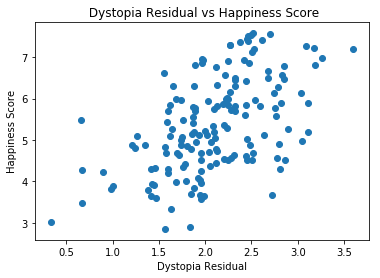

In [23]:

# Dystopia Residual vs Happiness Score
plt.scatter(x="Dystopia Residual",y="Happiness Score", data=df)
plt.title(" Dystopia Residual vs Happiness Score")
plt.xlabel("Dystopia Residual")
plt.ylabel("Happiness Score")
df["Dystopia Residual"].corr(df["Happiness Score"])

#countries with  high Dystopia Residual have high Happiness Score
#so it is positivly correlated with .53 corelation value

<Figure size 1800x1800 with 0 Axes>

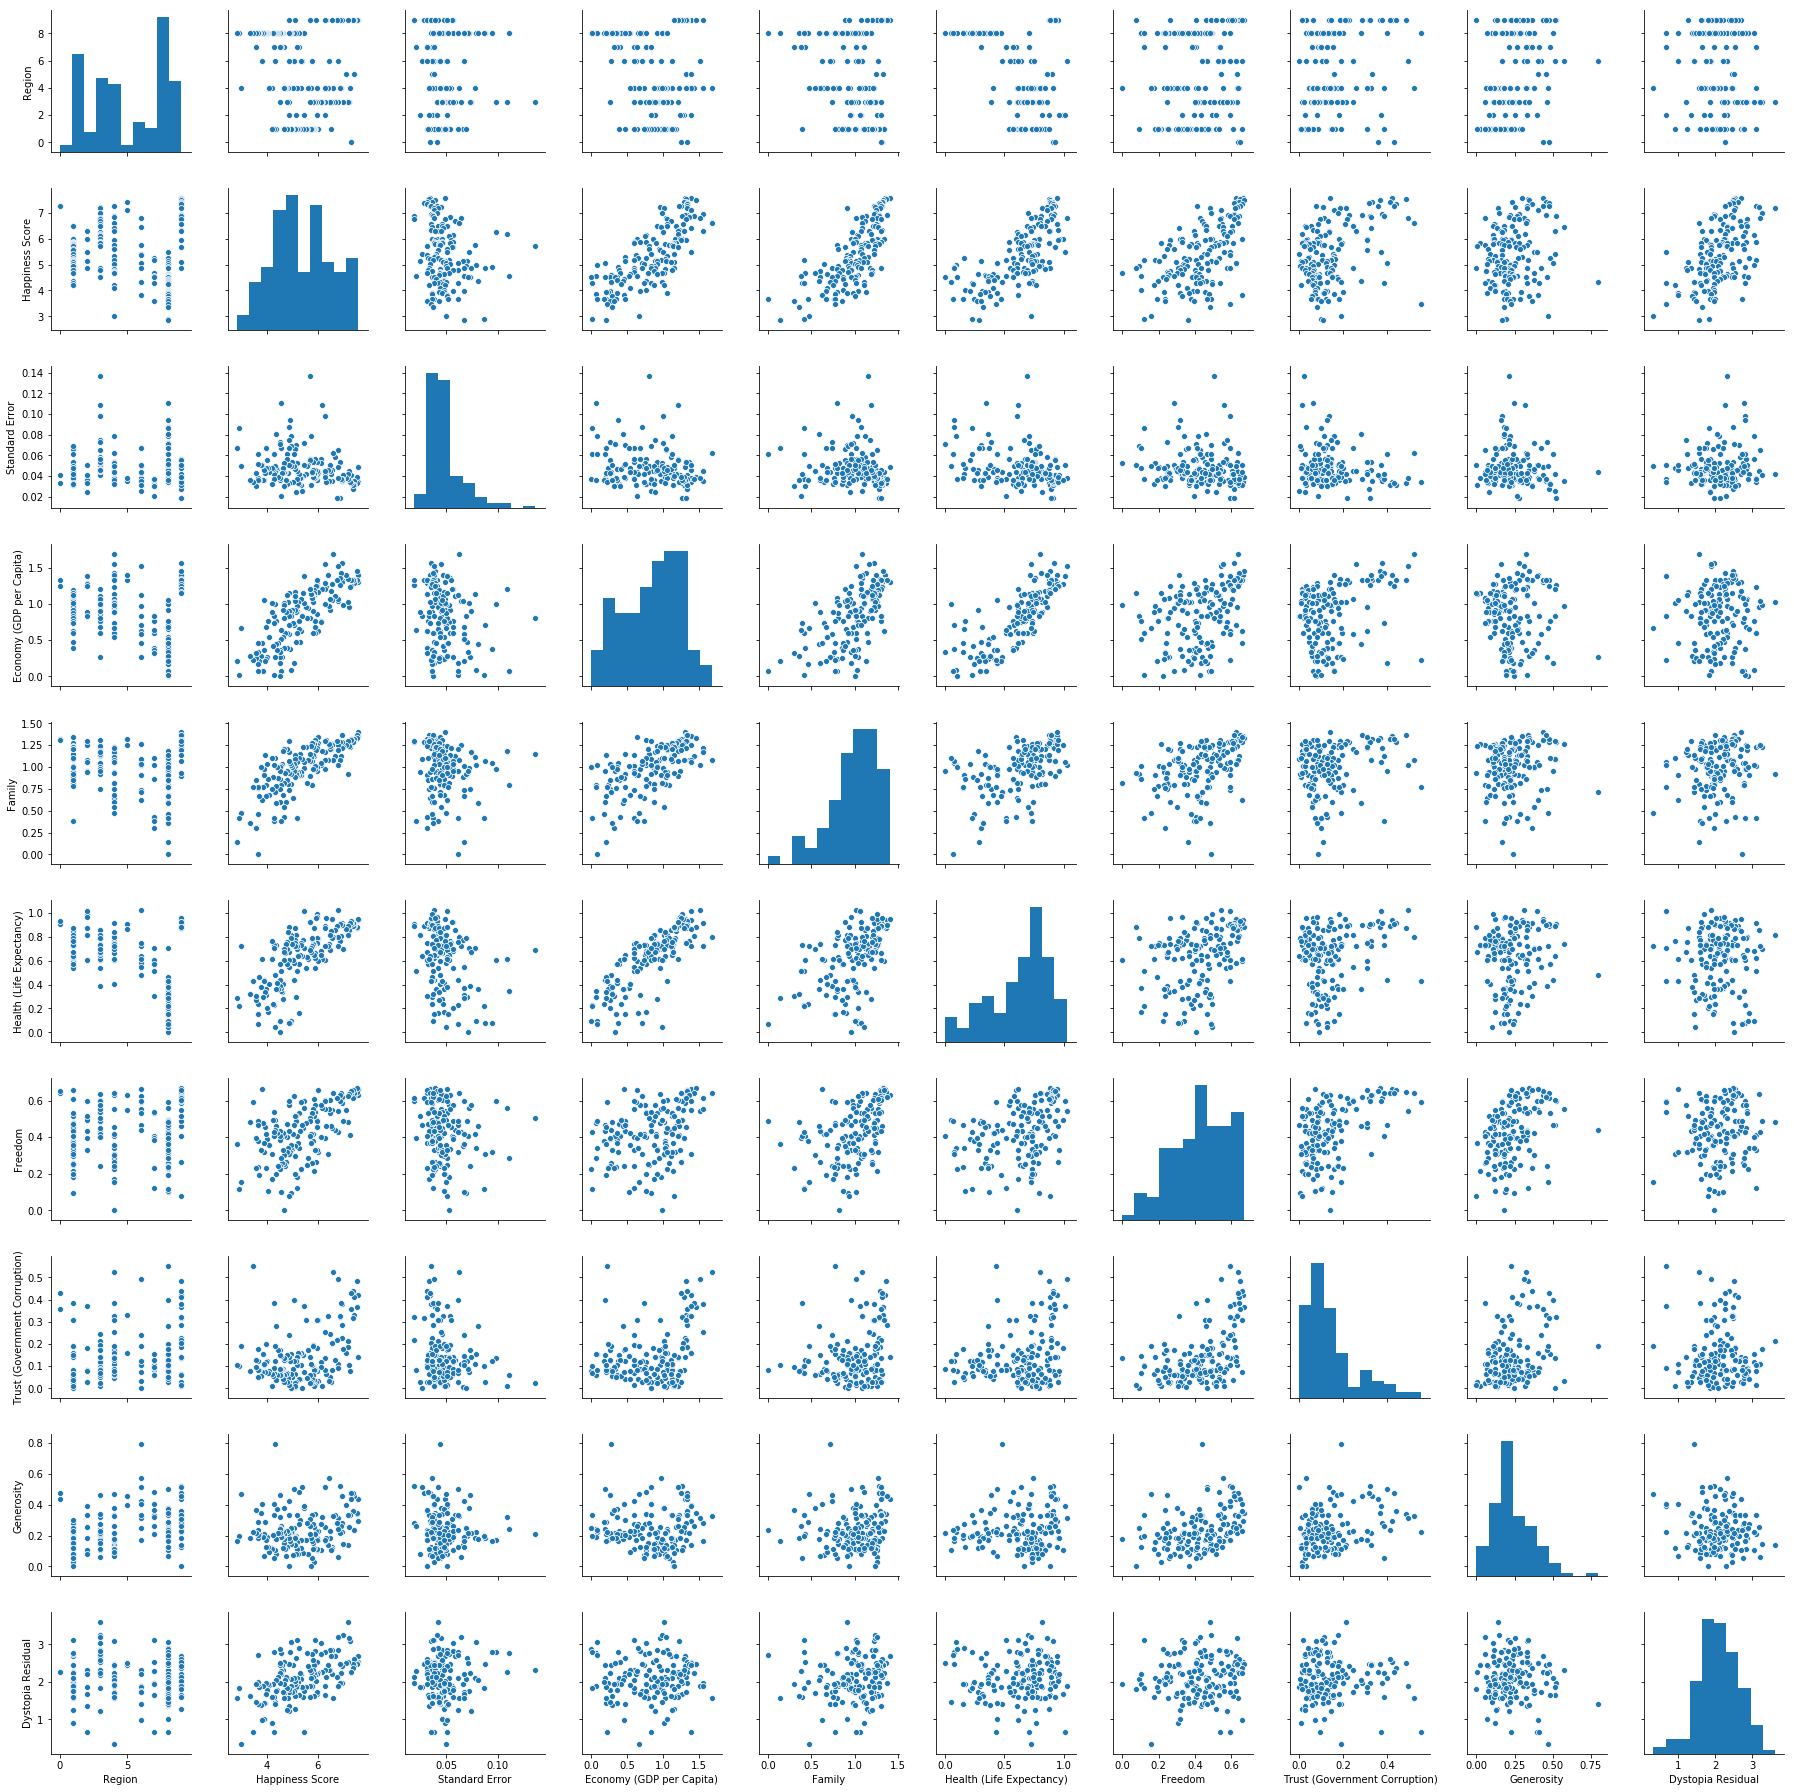

In [24]:
plt.figure(figsize=(25,25))
sns.pairplot(df)

#from above pair plot we can see relation between various other independent variables as well.

# Data cleaning and transformation

In [25]:
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [26]:
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(df))

StandardScaler(copy=True, with_mean=True, with_std=True)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


Region                              AxesSubplot(0.125,0.657941;0.168478x0.222059)
Happiness Score                  AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Standard Error                   AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Family                              AxesSubplot(0.125,0.391471;0.168478x0.222059)
Health (Life Expectancy)         AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Freedom                          AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Trust (Government Corruption)    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Generosity                             AxesSubplot(0.125,0.125;0.168478x0.222059)
Dystopia Residual                   AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

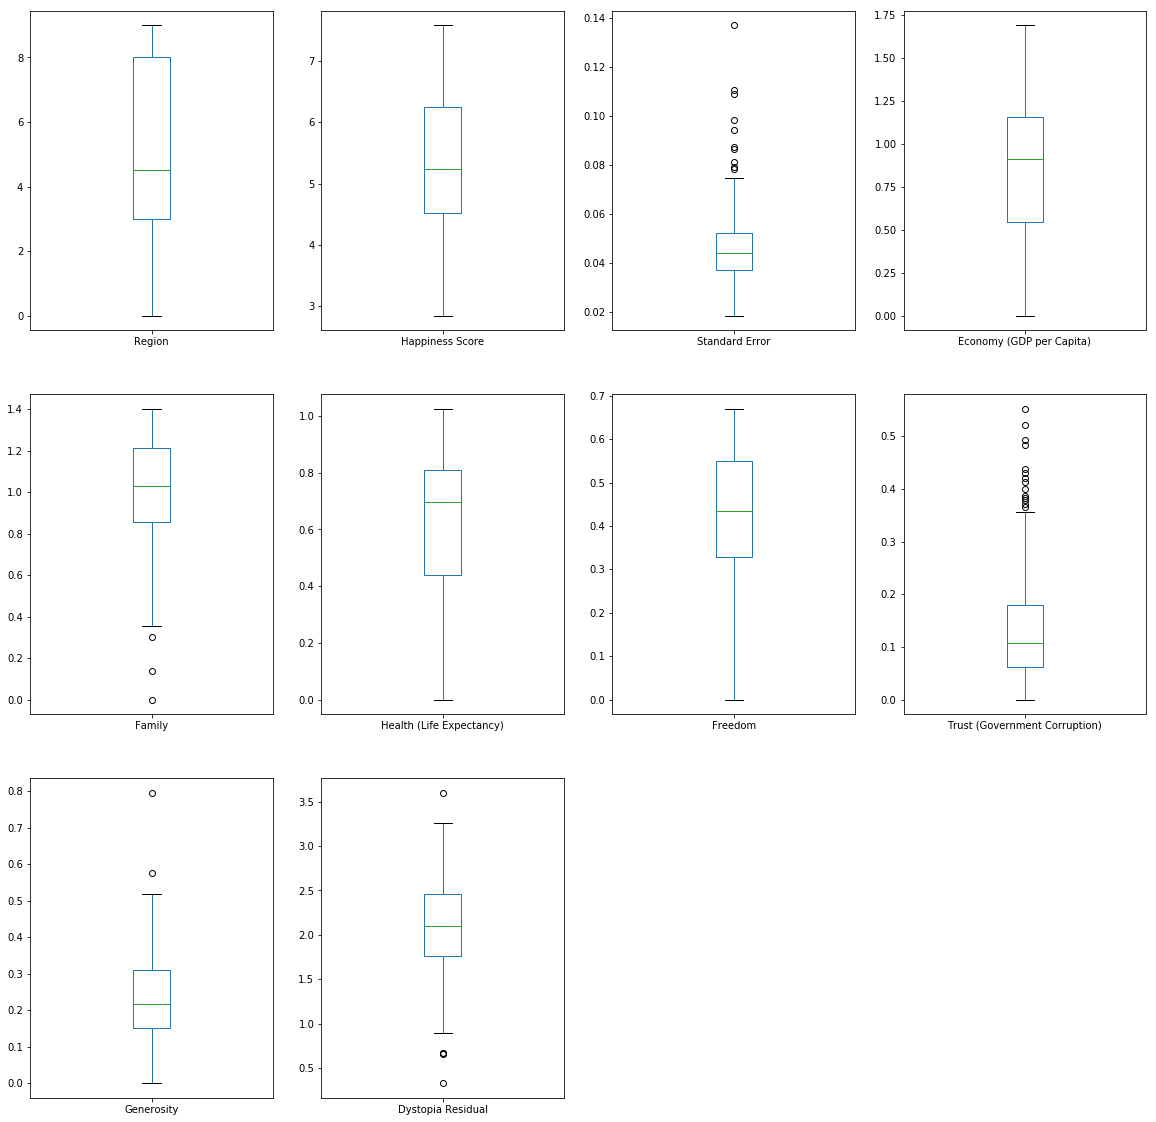

In [27]:
df.plot(kind="box", subplots=True, layout=(3,4),figsize=(20,20))

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.30025593, 1.93736005, 0.80592569, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.30025593, 1.91458063, 0.05588945, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.30025593, 1.88479215, 0.8544869 , ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [0.37544095, 2.0761992 , 0.13253425, ..., 0.38141902, 1.85689094,
        3.20843049],
       [0.96511655, 2.1646885 , 2.26396166, ..., 0.35771452, 0.31694987,
        0.48198451],
       [0.96511655, 2.22251319, 1.13418227, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [29]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=(9/158)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(149, 10)
using z score percentage of outlier removed: 5.69620253164557


In [30]:
#lets check with IQR method
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Region                           5.000000
Happiness Score                  1.717750
Standard Error                   0.015032
Economy (GDP per Capita)         0.612640
Family                           0.357582
Health (Life Expectancy)         0.371828
Freedom                          0.220762
Trust (Government Corruption)    0.118580
Generosity                       0.159330
Dystopia Residual                0.703005
dtype: float64


In [31]:
df_new1=df[~((df<(Q1-1.5 *IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)
percentage_ofouliers=((158-126)/158)*100

print("using IQR percentage of outlier removed:",percentage_ofouliers)

(126, 10)
using IQR percentage of outlier removed: 20.253164556962027


so using z score we have lost verry less data, so we can use df_new now

In [32]:
df_new.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [33]:
df_new.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [34]:
x=df_new.drop(labels="Happiness Score",axis=1)
y=df_new["Happiness Score"]

In [35]:
x.skew()

Region                          -0.096985
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [36]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method=("yeo-johnson"))
x=pd.DataFrame(x,columns=["Region","Standard Error","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"])
x.skew()

Region                          -0.222589
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
dtype: float64

In [37]:
#removed skewness, ouliers,and scaled for same magnitude
#now data is cleaned and ready for model fitting

# Model fitting

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.39,random_state=48)

In [40]:
x_train.shape

(90, 9)

In [41]:
y_train.shape

(90,)

In [42]:
x_test.shape

(59, 9)

In [43]:
y_test.shape

(59,)

In [ ]:
#linear regression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

In [ ]:
lm.coef_

In [ ]:
lm.intercept_

In [ ]:
lm.score(x_train,y_train)

In [ ]:
pred=lm.predict(x_test)
print("predicted result price:", pred)
print("actual price:", y_test)

In [45]:
#SVR

In [44]:
from sklearn.svm import SVR
klist=["poly", 'linear',"rbf"]
for i in klist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train, y_train))

0.96526327352934
0.9956613742244644
0.9891076769222936


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


     Actual   Predict  Difference
98    4.876  4.741056    0.134944
43    6.003  5.779733    0.223267
138   3.989  3.985933    0.003067
123   4.436  4.114065    0.321935
72    5.429  5.395272    0.033728
119   4.517  4.871751   -0.354751
19    6.901  6.904096   -0.003096
55    5.833  5.709654    0.123346
34    6.411  6.142626    0.268374
130   4.292  4.754267   -0.462267
141   3.904  3.863915    0.040085
37    6.298  6.236211    0.061789
20    6.867  6.593709    0.273291
75    5.332  5.179929    0.152071
89    5.073  4.945841    0.127159
82    5.192  5.135941    0.056059
11    7.226  6.847188    0.378812
108   4.694  4.700109   -0.006109
58    5.813  5.766413    0.046587
76    5.286  5.415741   -0.129741
8     7.286  6.228203    1.057797
83    5.140  5.294478   -0.154478
66    5.689  5.673839    0.015161
154   3.340  3.846175   -0.506175
133   4.218  4.653383   -0.435383
4     7.427  7.281095    0.145905
32    6.477  6.548220   -0.071220
91    5.013  5.052062   -0.039062
136   4.033  4

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


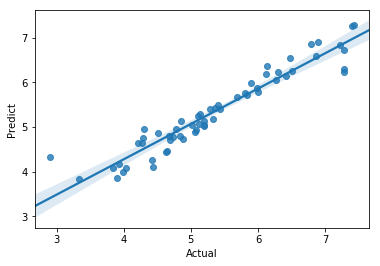

In [73]:
pred=sv.predict(x_test)
result=pd.DataFrame({
    'Actual':y_test,
    'Predict':pred, "Difference":(y_test-pred)})
print(result)
sns.regplot(x='Actual',y='Predict',data=result)

# Model evaluation

In [63]:
print('Errors:')
print("mean absolute error:", mean_absolute_error(y_test, pred))
print("mean squared error:", mean_squared_error(y_test, pred))
print("root mean squared error:", np.sqrt(mean_squared_error(y_test, pred)))

Errors:
mean absolute error: 0.22551101414606003
mean squared error: 0.1195367858232942
root mean squared error: 0.3457409229803354


In [64]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8981909332676812


In [66]:
#Cross validation

In [65]:
from sklearn.model_selection import cross_val_score
cvscore=cross_val_score(sv,x,y,cv=5)
print(cvscore)
print(cvscore.mean(),cvscore.std() )

[-10.65324051   0.37921902   0.66711364  -0.29378831  -4.83131942]
-2.9464031155021795 4.338245806171786


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [83]:
#Ensemble
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
#ls=Lasso(alpha=1.0) default
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.9965420332692162

In [75]:
ls.coef_

array([-0.0467276 ,  0.0030946 ,  0.39174045,  0.24013937,  0.23886402,
        0.15055835,  0.08668384,  0.11452166,  0.52202143])

In [78]:
rd.coef_

array([-0.04696683,  0.00321394,  0.39197047,  0.240082  ,  0.23869189,
        0.15059169,  0.08680279,  0.11474937,  0.52215365])

In [76]:
rd=Ridge(alpha=0.0001)
#ls=Lasso(alpha=1.0) default
rd.fit(x_train, y_train)
rd.score(x_train, y_train)

0.9965421103490136

In [77]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train, y_train)
print(enr.score(x_train, y_train))
enpred=enr.predict(x_test)
enr.coef_

0.9965420775523641


array([-0.04683077,  0.0031505 ,  0.39173366,  0.24016114,  0.23885713,
        0.15056305,  0.08675691,  0.1146042 ,  0.52204788])